In [1]:
import numpy as np
import pandas as pd

In [2]:
the_dtypes = {"date": str, "county": str, "state": str, "fips": object, "cases": int, "deaths": int}
the_na_vals = {"fips": "NaN"}

In [3]:
counties = pd.read_csv("us-counties.csv", parse_dates=["date"], infer_datetime_format=True, dtype=the_dtypes, na_values=the_na_vals)

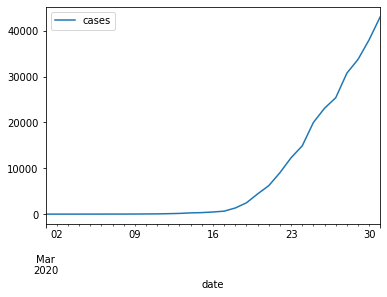

In [8]:
counties[counties["county"] == 'New York City'].plot(x="date", y="cases")

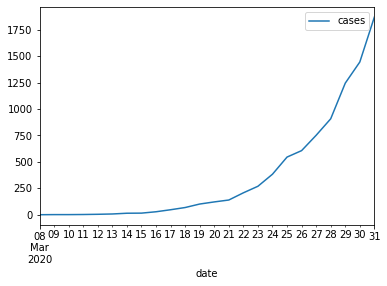

In [22]:
counties[(counties["county"] == "Fairfield") & (counties["state"] == "Connecticut")].plot(x="date", y="cases")

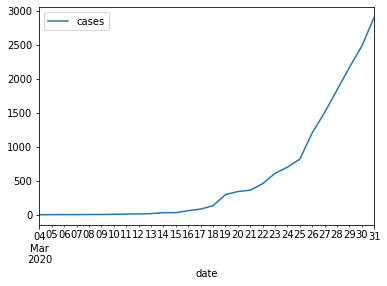

In [23]:
counties[counties["county"] == "Bergen"].plot(x="date", y="cases")

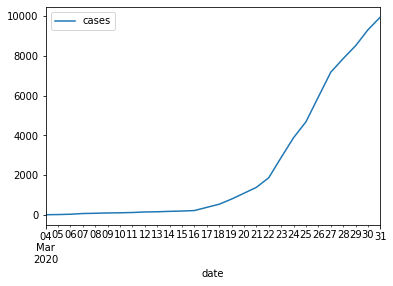

In [24]:
counties[counties["county"] == "Westchester"].plot(x="date", y="cases")